In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import skimage
from sklearn.cluster import KMeans
from skimage import io
from skimage import color
from skimage import data
import cv2
import os, glob
import tools

In [2]:
image_paths = os.listdir("Data")
image1 = skimage.io.imread("Data/" + "4.jpg")#image_paths[3])

In [3]:
r = image1[:,:,0]
g = image1[:,:,1]
b = image1[:,:,2]

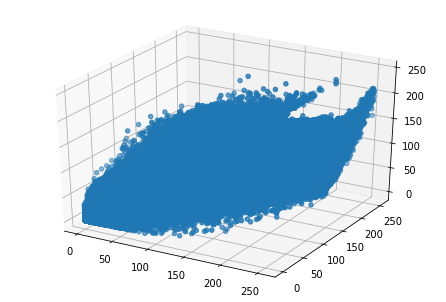

In [4]:
r = r.flatten()
g = g.flatten()
b = b.flatten()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [5]:
image1flat = image1.reshape((image1.shape[0] * image1.shape[1], 3))
km = KMeans(n_clusters = 7)
km.fit(image1flat)
colors = km.cluster_centers_.astype(int)

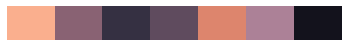

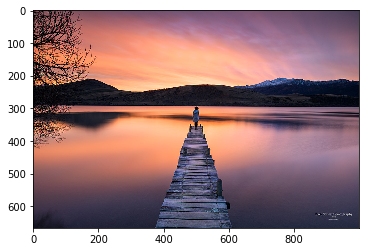

In [6]:
# https://buzzrobot.com/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036
numLabels = np.arange(0, 8)
(hist, _) = np.histogram(km.labels_, bins = numLabels)
hist = hist.astype("float")
hist /= hist.sum()
colors1 = km.cluster_centers_
colors1 = colors1[(-hist).argsort()]
hist = hist[(-hist).argsort()]
chart = np.zeros((50, 500, 3), np.uint8)
start = 0
for i in range(7):
    end = start + 500/7
            
    #getting rgb values
    r = colors1[i][0].item()
    g = colors1[i][1].item()
    b = colors1[i][2].item()

    #using cv2.rectangle to plot colors
    cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
    start = end	

#display chart
plt.figure()
plt.axis("off")
plt.imshow(chart)
plt.show()
plt.imshow(image1)

(667, 1000, 3)


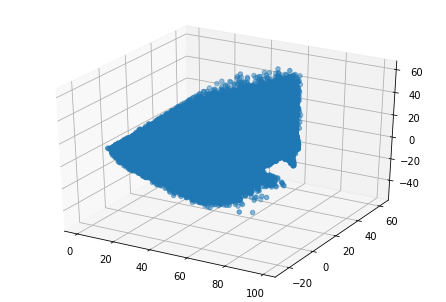

In [7]:
print(image1.shape)
imagelab = skimage.color.rgb2lab(image1)

l = imagelab[:,:,0]
a = imagelab[:,:,1]
b = imagelab[:,:,2]

l = l.flatten()
a = a.flatten()
b = b.flatten()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(l, a, b)
plt.show()

In [8]:
imagelabflat = imagelab.reshape((imagelab.shape[0] * imagelab.shape[1], 3))
km = KMeans(n_clusters = 7)
km.fit(imagelabflat)
colors = km.cluster_centers_
print(colors)

[[ 41.65648497  14.59728134 -11.05007525]
 [ 58.6138374   20.51618028  -4.74690755]
 [  7.70024202   3.18051963  -5.53720247]
 [ 41.69535643  21.34427575   9.55437599]
 [ 77.05426373  25.45476489  32.16857274]
 [ 23.55720691   7.72162625 -12.09735631]
 [ 63.31671272  29.72481895  21.9005841 ]]


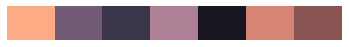

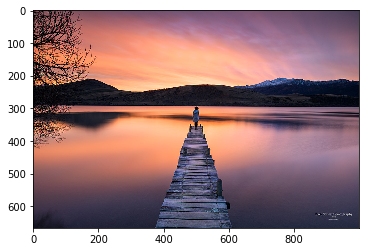

In [9]:
# https://buzzrobot.com/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036
numLabels = np.arange(0, 8)
(hist, _) = np.histogram(km.labels_, bins = numLabels)
hist = hist.astype("float")
hist /= hist.sum()
colors1 = km.cluster_centers_
colors1 = colors1[(-hist).argsort()]
colors1 = np.expand_dims(colors1, axis = 0)
colors1 = skimage.color.lab2rgb(colors1) * 255
colors1 = np.squeeze(colors1, axis = 0)


hist = hist[(-hist).argsort()]
chart = np.zeros((50, 500, 3), np.uint8)
start = 0
for i in range(7):
    end = start + 500/7
            
    #getting rgb values
    r = colors1[i][0].item()
    g = colors1[i][1].item()
    b = colors1[i][2].item()

    #using cv2.rectangle to plot colors
    cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
    start = end	

#display chart
plt.figure()
plt.axis("off")
plt.imshow(chart)
plt.show()
plt.imshow(image1)